In [22]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Initialize data storage for plotting
all_importances = []
all_filenames = []

data_dir = '../data/processed'

# Read all datasets
dir = os.listdir(data_dir)
for file in dir:
    if 'model' in file:
        continue
    if file.endswith('.pcl'):
        with open(os.path.join(data_dir, file), 'rb') as f:
            imp = pickle.load(f)  # Load the dictionary of importances
            
            # Normalize the importance values to a range of 0 to 1
            min_val = min(imp.values())
            max_val = max(imp.values())
            normalized_imp = {key: (value - min_val) / (max_val - min_val) for key, value in imp.items()}
            
            all_importances.append(normalized_imp)
            all_filenames.append(file.replace('_importances.pcl', ''))  # Remove .pcl for x-axis labels


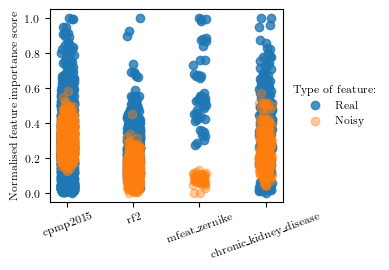

In [95]:
# Prepare to plot
x_positions = np.arange(len(all_filenames))  # Unique x-positions for datasets
bar_width = 0.2  # Width of each scatter group for visibility

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.figure(figsize=(3, 2.5))

# Plot data for each dataset
for i, (dataset_name, importance) in enumerate(zip(all_filenames, all_importances)):
    keys = list(importance.keys())
    values = list(importance.values())
    
    # Distinguish between random and real columns
    random_vals = [values[j] for j, k in enumerate(keys) if 'Random' in k]
    real_vals = [values[j] for j, k in enumerate(keys) if 'Random' not in k]
    
    random_jitter = np.random.uniform(-bar_width / 2, bar_width / 2, size=len(random_vals))
    real_jitter = np.random.uniform(-bar_width / 2, bar_width / 2, size=len(real_vals))

    
    # Plot real columns
    plt.scatter(
        x_positions[i] + real_jitter,
        real_vals,
        color="#1f77b4",
        alpha=0.8,
        label='Real' if i == 0 else ""
    )

    # Plot random columns
    plt.scatter(
        x_positions[i] + random_jitter,
        random_vals,
        color="#ff7f0e",
        alpha=0.4,
        label='Noisy' if i == 0 else ""
    )

# Customize plot
plt.xticks(x_positions, all_filenames, rotation=20)
plt.ylabel('Normalised feature importance score')
plt.legend(title='Type of feature:', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig('../reports/figures/feat_importances.pdf', bbox_inches='tight')

Text(0, 0.5, 'MAE')

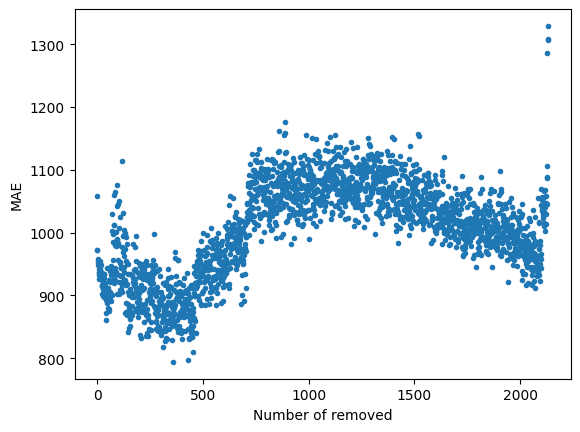

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('../data/processed/viktor_res.npz')
plt.plot(data['x'],data['mae'],'.')
plt.xlabel('Number of removed')
plt.ylabel('MAE')

In [3]:
import pickle

with open('../cpmp2015_str_feat_imp.pcl', 'rb') as f:
    feature_importance_scores = pickle.load(f)

In [57]:
fimp = feature_importance_scores[0]
fimp = np.array(fimp)
fimp = fimp.astype(float)

In [52]:
fimp = (fimp - np.min(fimp)) / (np.max(fimp) - np.min(fimp))


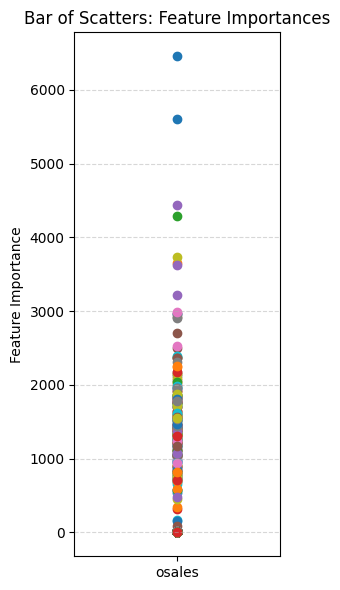

In [58]:
import matplotlib.pyplot as plt

# Create a "bar of scatters" plot with a single column 
plt.figure(figsize=(3, 6))

all_vals = list(fimp)

# Plot scatter points
for val in all_vals:
    plt.scatter(0, val)

# Enhance plot
plt.title("Bar of Scatters: Feature Importances")
plt.ylabel("Feature Importance")
plt.xticks([0], ["osales"])
plt.xlim(-0.5, 0.5)
# plt.legend(handles=[
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha=0.5, label='Random Columns'),
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', alpha=0.5, label='Other Columns')
# ])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()